In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import os
import pickle


In [9]:
dataset = 'SMD'
data_path = "../ServerMachineDataset/processed"
x_dim = 38

file = 1, 1

In [4]:
f = open(f'{data_path}/machine-{file[0]}-{file[1]}_train.pkl', "rb")
data = pickle.load(f).reshape((-1, x_dim))
f.close()
df = pd.DataFrame(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.032258,0.039195,0.027871,0.024390,0.0,0.915385,0.343691,0.0,0.020011,0.000122,...,0.0,0.004298,0.029993,0.022131,0.0,0.000045,0.034677,0.034747,0.0,0.0
1,0.043011,0.048729,0.033445,0.025552,0.0,0.915385,0.344633,0.0,0.019160,0.001722,...,0.0,0.004298,0.030041,0.028821,0.0,0.000045,0.035763,0.035833,0.0,0.0
2,0.043011,0.034958,0.032330,0.025552,0.0,0.915385,0.344633,0.0,0.020011,0.000122,...,0.0,0.004298,0.026248,0.021101,0.0,0.000045,0.033012,0.033082,0.0,0.0
3,0.032258,0.028602,0.030100,0.024390,0.0,0.912821,0.342750,0.0,0.021289,0.000000,...,0.0,0.004298,0.030169,0.025733,0.0,0.000022,0.035112,0.035182,0.0,0.0
4,0.032258,0.019068,0.026756,0.023229,0.0,0.912821,0.342750,0.0,0.018734,0.000000,...,0.0,0.004298,0.027240,0.022645,0.0,0.000034,0.033447,0.033517,0.0,0.0


<Figure size 432x288 with 0 Axes>

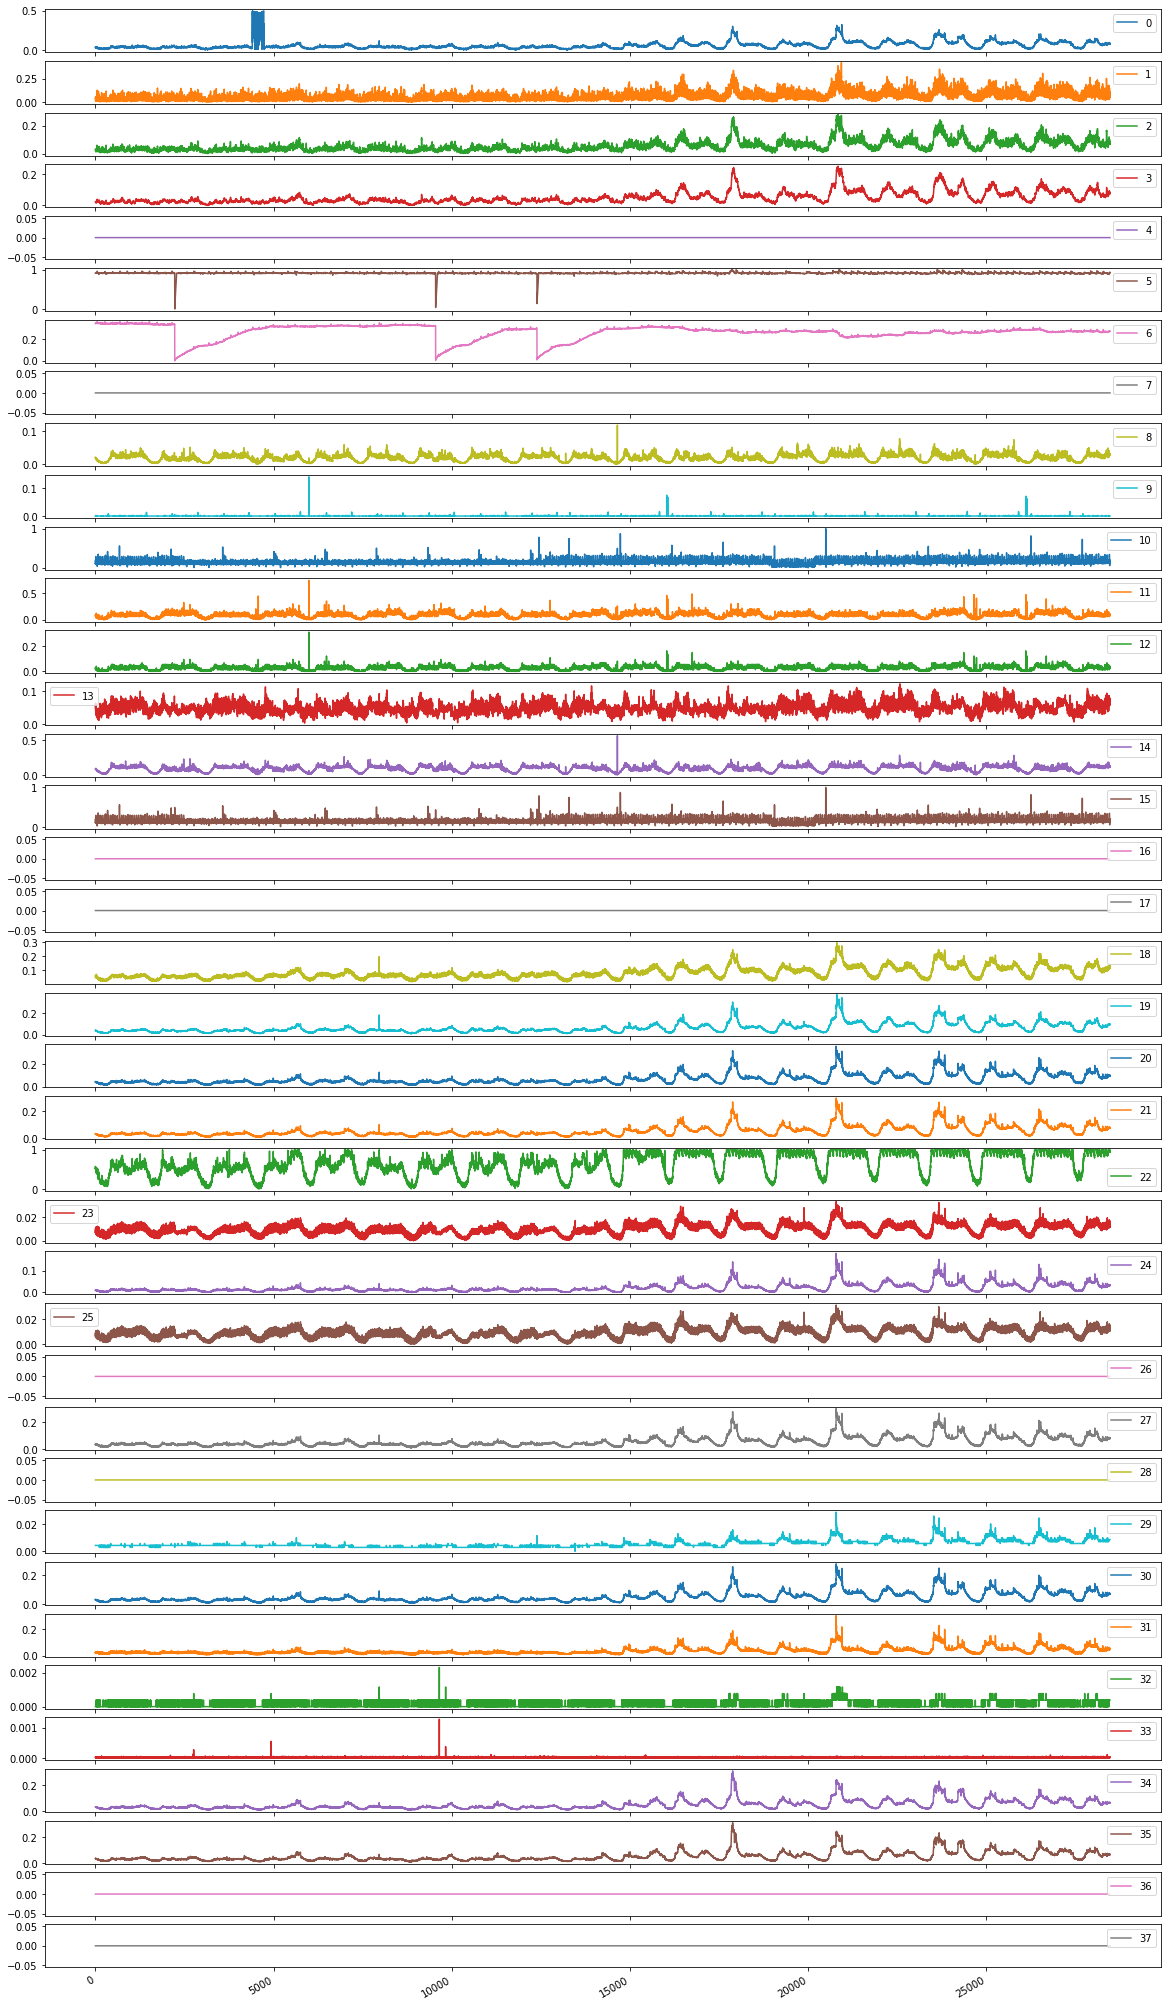

In [5]:
plt.tight_layout()
df.plot(subplots=True, figsize=(20,40))
plt.show();

In [6]:
f = open(f'{data_path}/machine-{file[0]}-{file[1]}_test.pkl', "rb")
data = pickle.load(f).reshape((-1, x_dim))
f.close()
df_test = pd.DataFrame(data)

f = open(f'{data_path}/machine-{file[0]}-{file[1]}_test_label.pkl', "rb")
test_labels = pickle.load(f)
f.close()
df_test['Anomaly'] = test_labels

<Figure size 432x288 with 0 Axes>

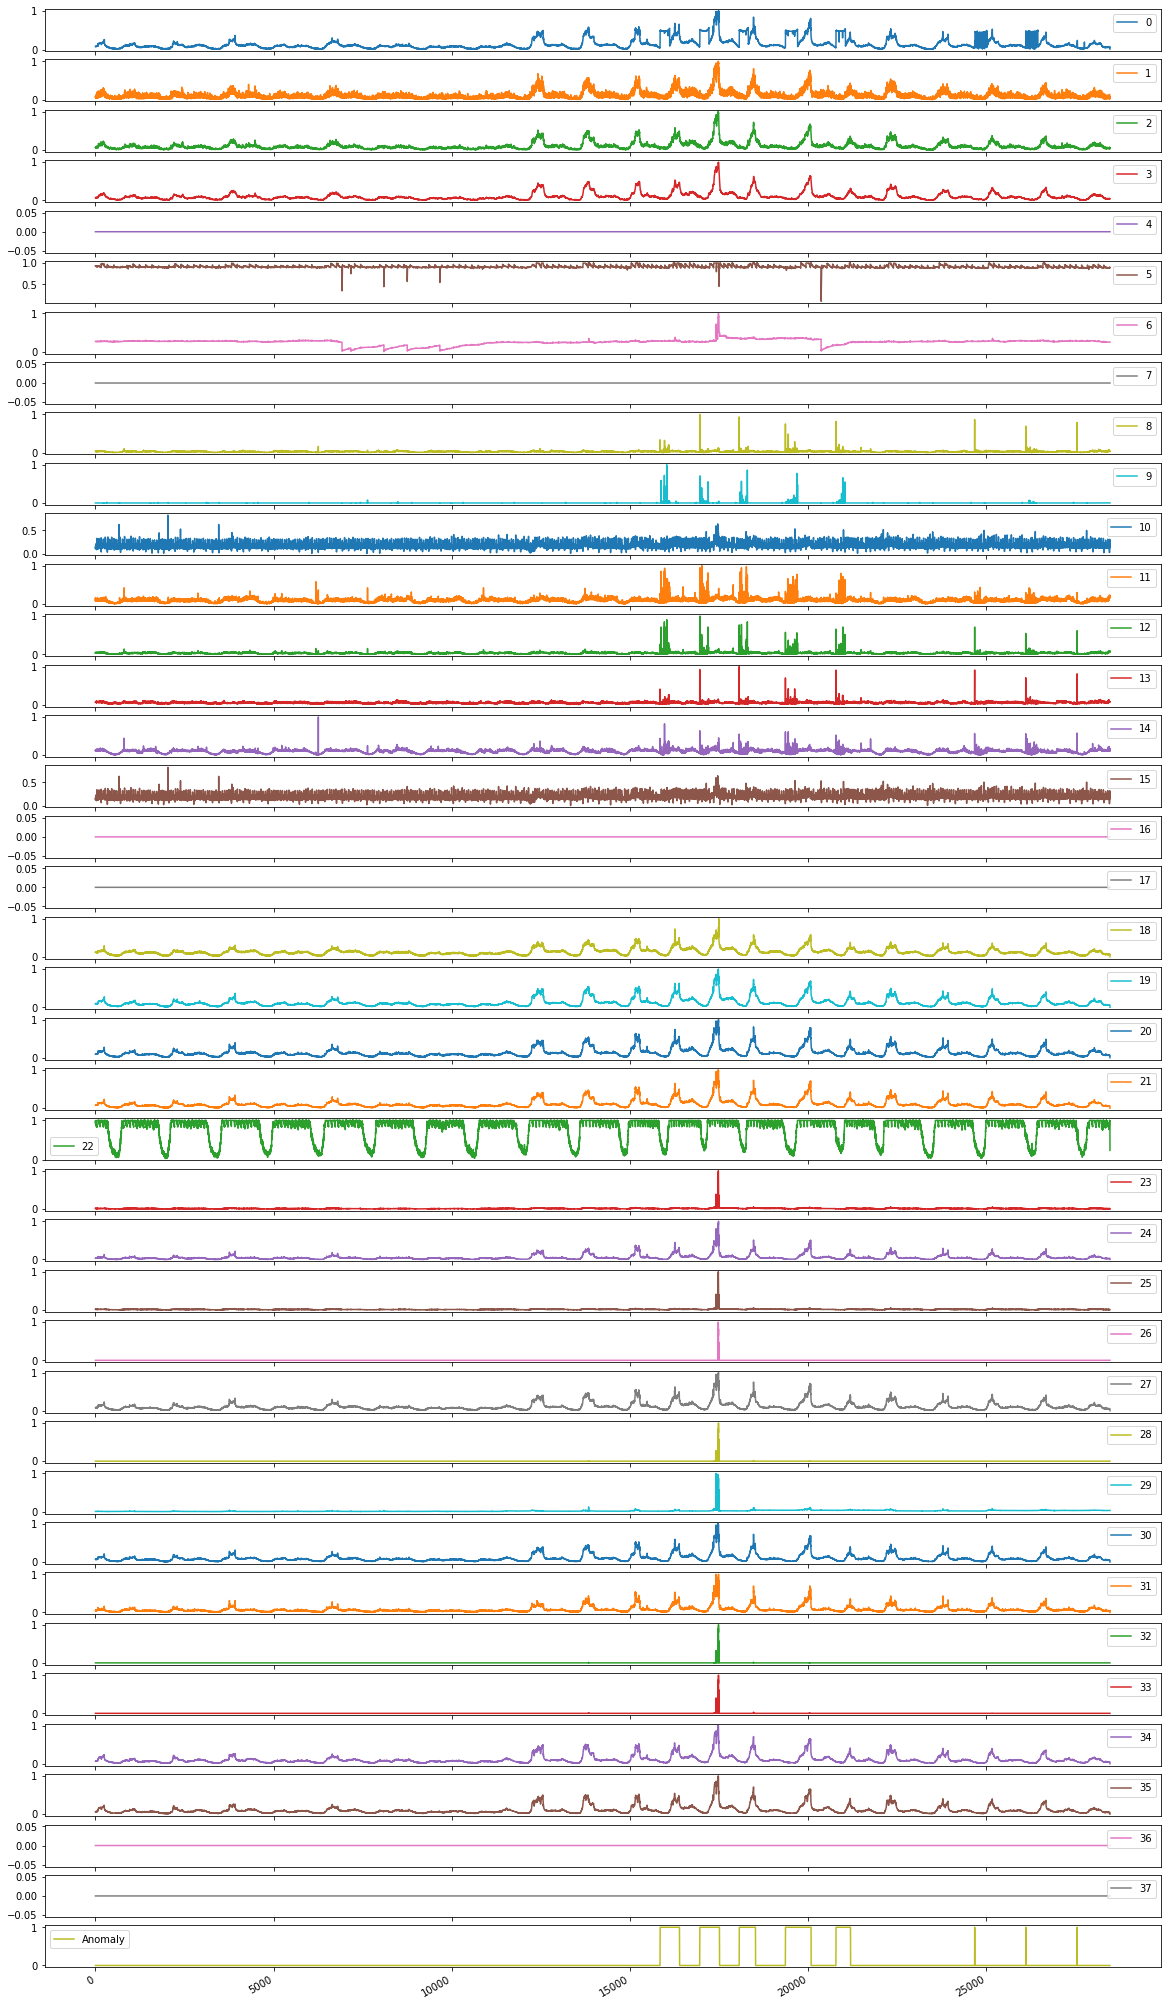

In [7]:
plt.tight_layout()
df_test.plot(subplots=True, figsize=(20,40))
plt.show();

In [7]:
df.shape[0] + df_test.shape[0]

47387

In [8]:
df_comb = pd.concat([df, df_test], ignore_index=True)
df_comb.shape

(47387, 39)

<Figure size 432x288 with 0 Axes>

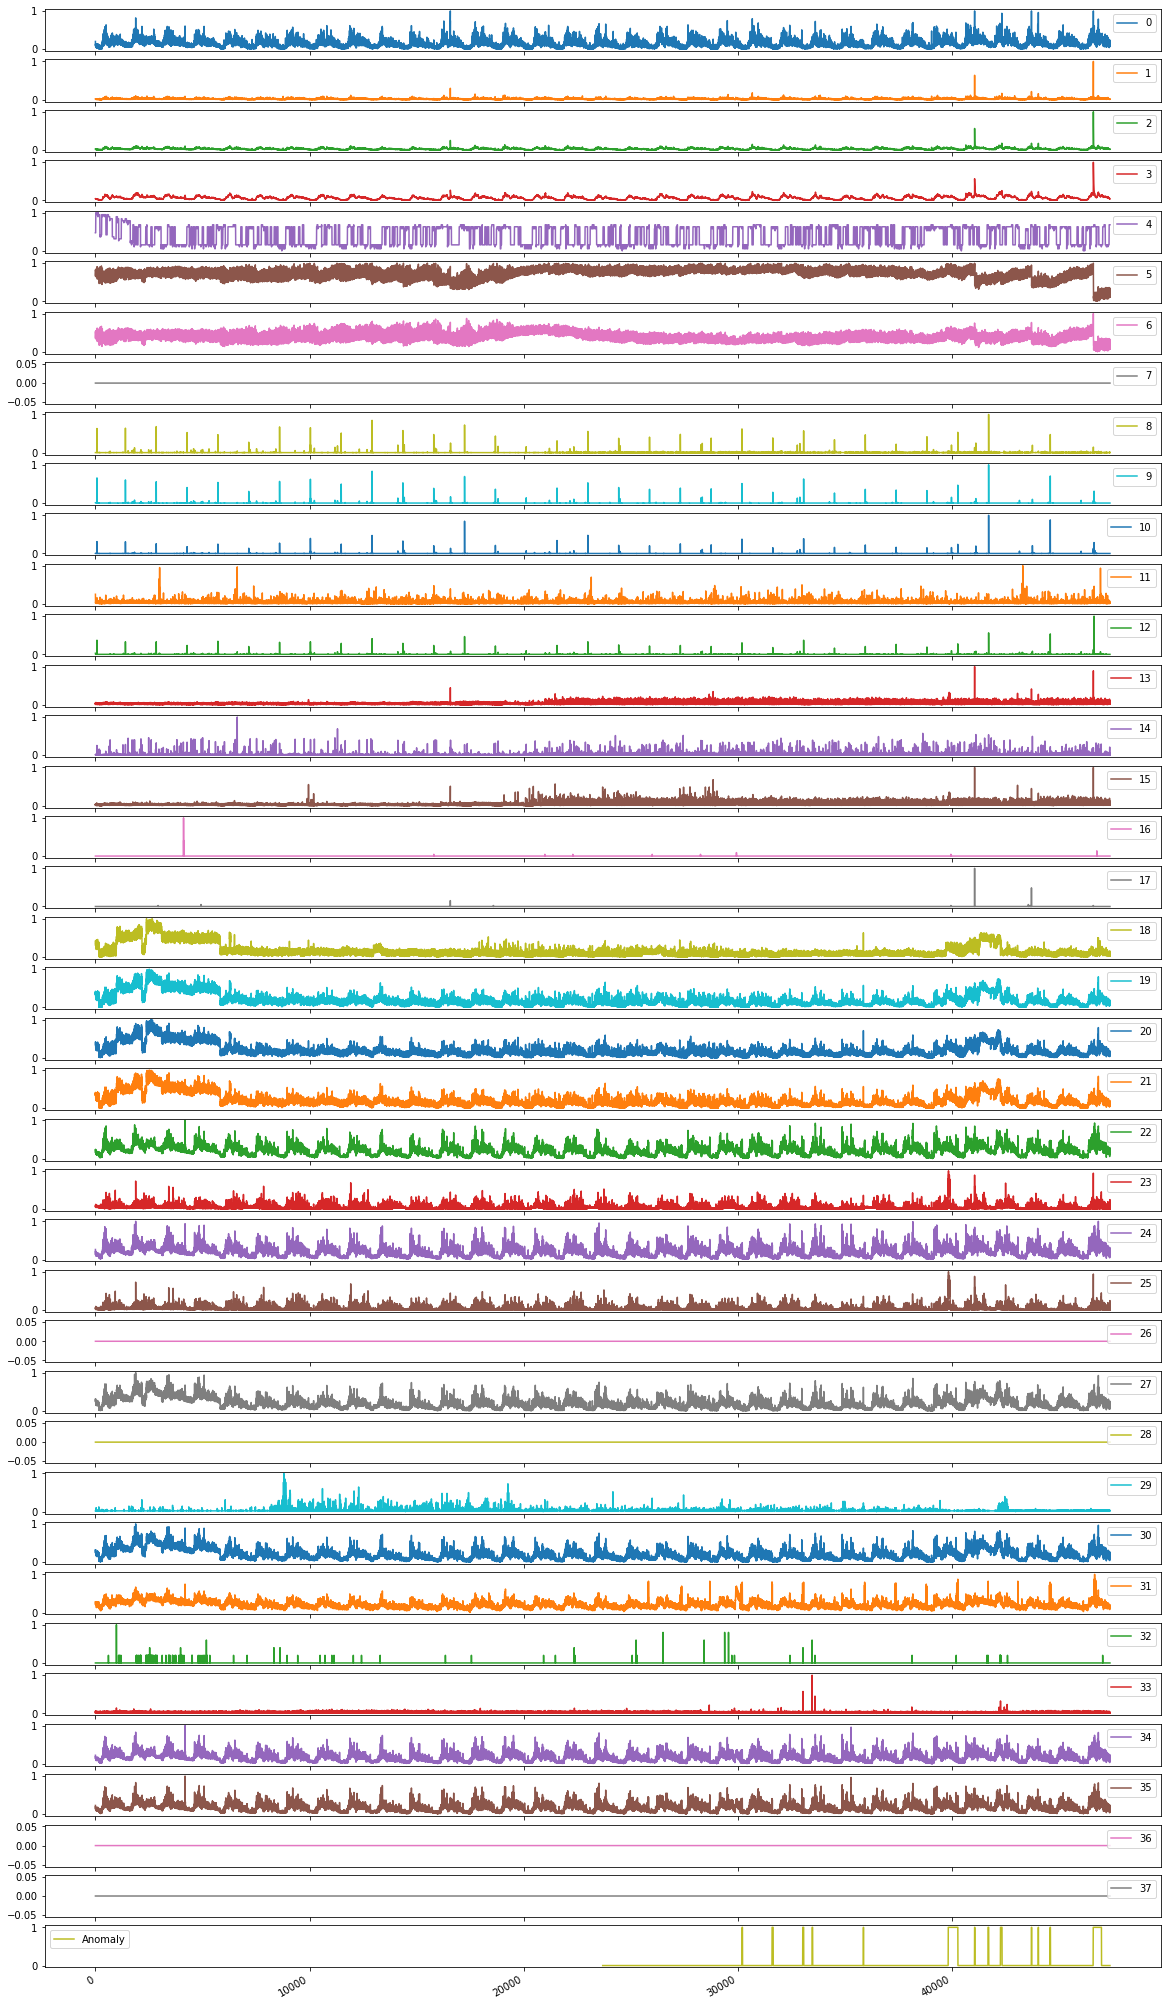

In [9]:
plt.tight_layout()
df_comb.plot(subplots=True, figsize=(20,40))
plt.show();

In [10]:
from alibi_detect.od import SpectralResidual
from alibi_detect.utils.visualize import plot_instance_score, plot_feature_outlier_ts
from scipy import interpolate

od = SpectralResidual(
    threshold=None,
    window_amp=500,
    window_local=500,
    n_est_points=10,
    n_grad_points=5
)

No threshold level set. Need to infer threshold using `infer_threshold`.


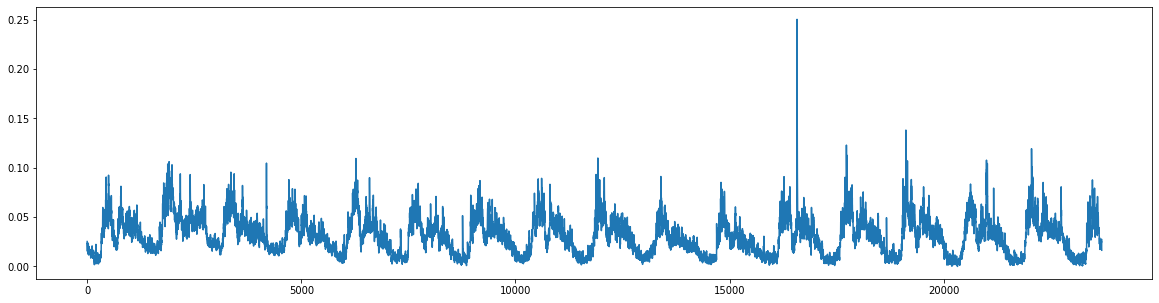

In [11]:
x = df.iloc[:,2].values
plt.figure(figsize=(20, 5))
plt.plot(x)

In [12]:
od.infer_threshold(x, threshold_perc=99.9)
od.threshold

4.166644035446716

In [13]:
preds = od.predict(
    x,
    #t=t,  # array with timesteps, assumes dt=1 between observations if omitted
    return_instance_score=True
)

In [14]:
preds

{'data': {'instance_score': array([ 6.96504892,  1.79670882,  3.63287959, ..., -0.42278145,
          0.37681006, -0.77091269]),
  'feature_score': None,
  'is_outlier': array([1, 0, 0, ..., 0, 0, 0])},
 'meta': {'name': 'SpectralResidual',
  'detector_type': 'online',
  'data_type': 'time-series'}}

In [15]:
a_scores = preds['data']['instance_score']
is_a = preds['data']['is_outlier']

print(is_a.shape)
print(x.shape)

(23693,)
(23693,)


In [16]:
x_interp = x.copy()
x_interp[np.where(is_a == 1)] = np.NaN
x_interp = pd.Series(x_interp)
print(pd.isna(x_interp).sum())
x_interp = x_interp.interpolate(method='pad')
print(pd.isna(x_interp).sum())

24
1


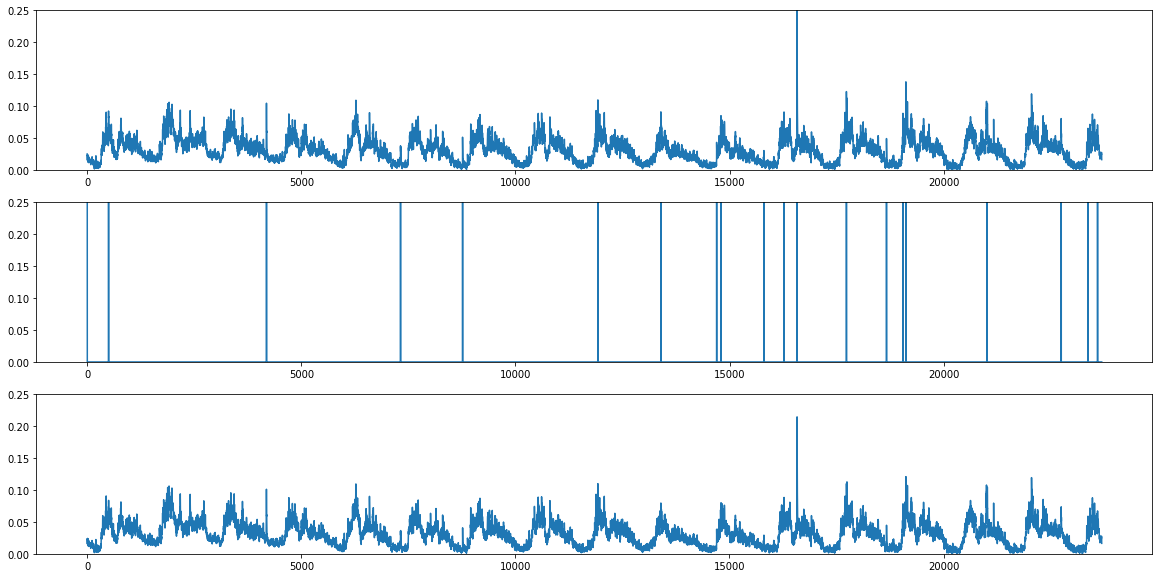

In [17]:

fig, axs = plt.subplots(3, figsize=(20,10))
axs[0].set_ylim([0, max(x)])
axs[1].set_ylim([0, max(x)])
axs[2].set_ylim([0, max(x)])

axs[0].plot(x)
axs[1].plot(is_a)
axs[2].plot(x_interp)


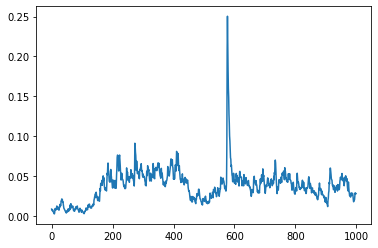

In [18]:
plt.plot(x[16000:17000])

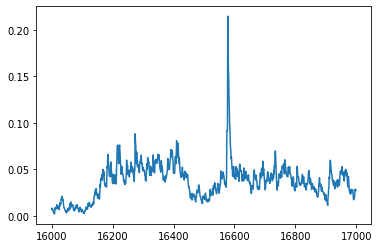

In [19]:
plt.plot(x_interp[16000:17000])

In [11]:
output = pd.read_csv('../output/smd/machine-1-1_test.csv')

In [12]:
output.head()

,Pred_0,True_0,RSE_0,Pred_1,True_1,RSE_1,Pred_2,True_2,RSE_2,Pred_3,...,True_35,RSE_35,Pred_36,True_36,RSE_36,Pred_37,True_37,RSE_37,Pred_Anomaly,True_Anomaly
0,0.152667,0.150538,0.002129,0.138314,0.153602,0.015288,0.139469,0.147157,0.007688,0.138006,...,0.168018,0.031946,-0.000059,0.0,0.000059,2.722140e-06,0.0,2.722140e-06,-1,0.0
1,0.152278,0.161290,0.009012,0.137965,0.159958,0.021993,0.139098,0.149387,0.010289,0.137623,...,0.168163,0.032453,-0.000059,0.0,0.000059,2.396875e-06,0.0,2.396875e-06,-1,0.0
2,0.153209,0.161290,0.008081,0.138727,0.150424,0.011697,0.139909,0.151616,0.011707,0.138425,...,0.169972,0.033376,-0.000063,0.0,0.000063,4.321337e-07,0.0,4.321337e-07,-1,0.0
3,0.155557,0.161290,0.005733,0.140792,0.115466,0.025326,0.142122,0.140468,0.001654,0.140712,...,0.167077,0.028193,-0.000062,0.0,0.000062,1.429347e-06,0.0,1.429347e-06,-1,0.0
4,0.155624,0.161290,0.005666,0.140856,0.137712,0.003144,0.142143,0.140468,0.001675,0.140670,...,0.170479,0.031630,-0.000074,0.0,0.000074,-4.094792e-06,0.0,4.094792e-06,-1,0.0


<Figure size 432x288 with 0 Axes>

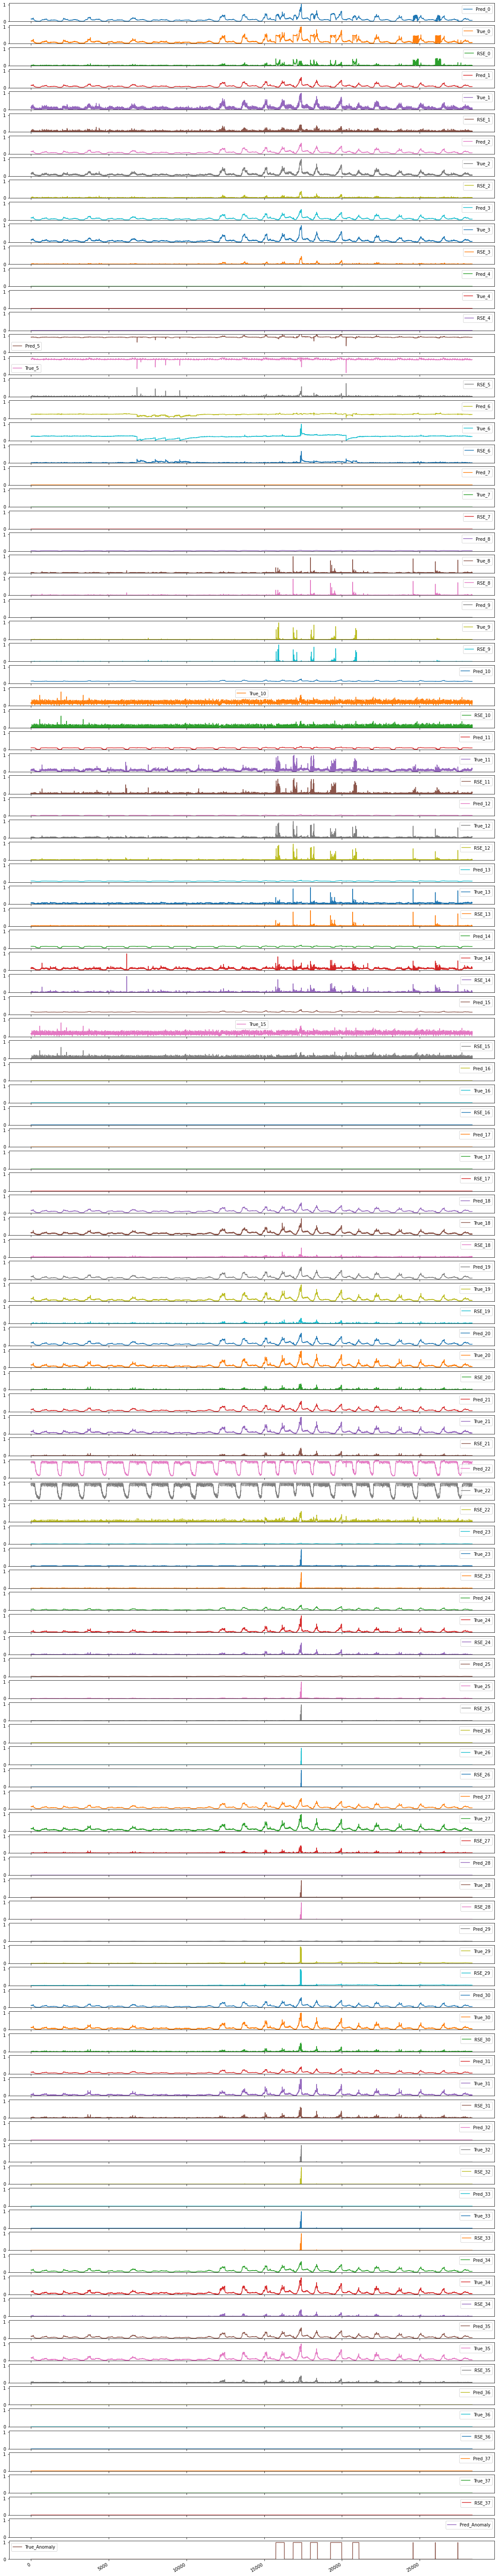

In [31]:
plt.tight_layout()
output.plot(subplots=True, figsize=(20,120), ylim=(0,1.1))
plt.show();

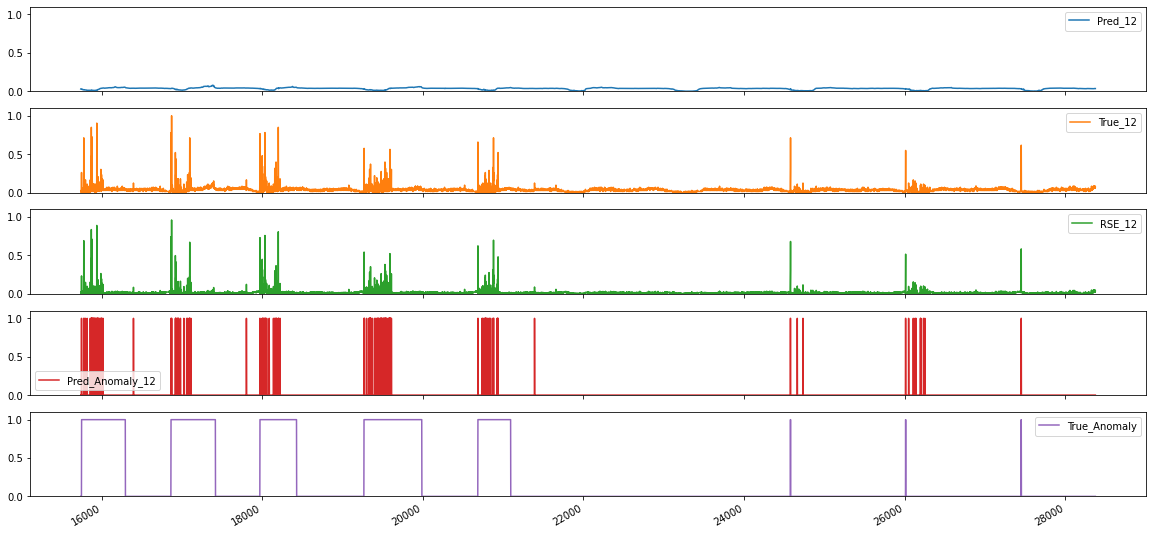

In [14]:
i = 12

# Calculate threshold loss = mean + 3std
rses = output.loc[:, f'RSE_{i}']
thresh = np.mean(rses) + 3*np.std(rses)

output[f'Pred_Anomaly_{i}'] = (rses > thresh).astype(int)

start, end = 15849, 16368
df = output.loc[start-110:, [f'Pred_{i}', f'True_{i}', f'RSE_{i}', f'Pred_Anomaly_{i}','True_Anomaly']]
df.plot(subplots=True, figsize=(20, 10), ylim=(0,1.1))
plt.show()

In [18]:
print(precision_score(output['True_Anomaly'], output[f'Pred_Anomaly_{i}']))
print(recall_score(output['True_Anomaly'], output[f'Pred_Anomaly_{i}']))
print(f1_score(output['True_Anomaly'], output[f'Pred_Anomaly_{i}']))

0.8863636363636364
0.07238307349665925
0.1338366506520247


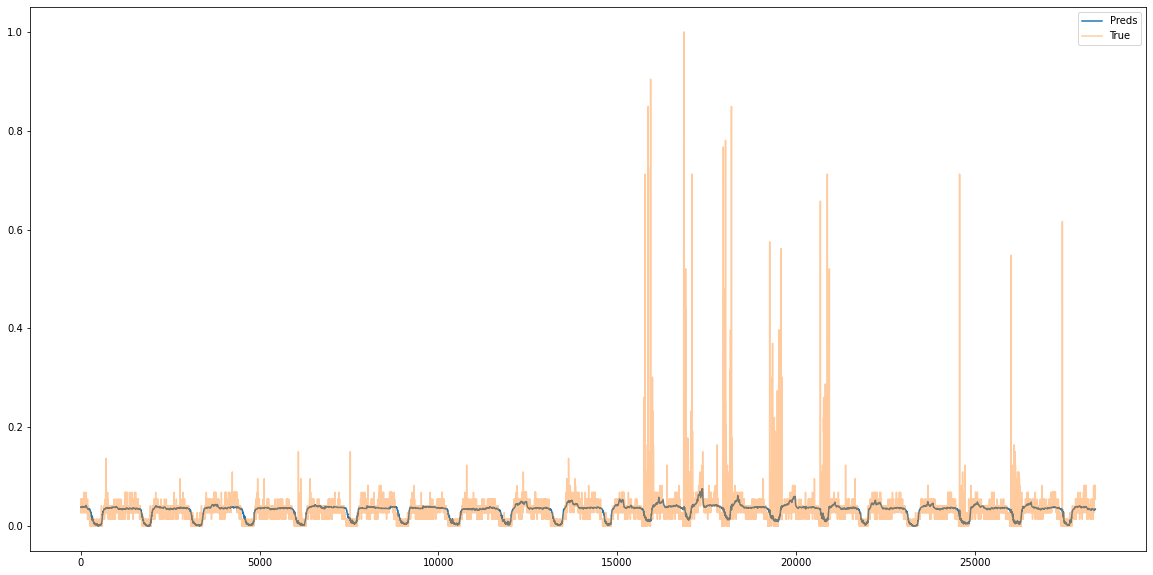

In [19]:

# Plot
plt.figure(figsize=(20, 10))
preds = output.loc[:, [f'Pred_{i}']]
true_y = output.loc[:, [f'True_{i}']]
plt.plot(preds.values, label='Preds')
plt.plot(true_y.values, label='True', alpha=0.4)

plt.legend()

In [20]:
# Compute anomaly for every feature
for i in range(38):
    rses = output.loc[:, f'RSE_{i}']
    thresh = np.mean(rses) + 20*np.std(rses)
    
    output[f'Pred_Anomaly_{i}'] = (rses > thresh).astype(int)

anomaly_preds = output.loc[:, [f'Pred_Anomaly_{i}' for i in range(38)]]
print(anomaly_preds.shape)

output['Pred_Anomaly_Global'] = (np.sum(anomaly_preds, 1) > 1).astype(int)
output.head()

(28378, 38)


,Pred_0,True_0,RSE_0,Pred_1,True_1,RSE_1,Pred_2,True_2,RSE_2,Pred_3,...,Pred_Anomaly_29,Pred_Anomaly_30,Pred_Anomaly_31,Pred_Anomaly_32,Pred_Anomaly_33,Pred_Anomaly_34,Pred_Anomaly_35,Pred_Anomaly_36,Pred_Anomaly_37,Pred_Anomaly_Global
0,0.152667,0.150538,0.002129,0.138314,0.153602,0.015288,0.139469,0.147157,0.007688,0.138006,...,0,0,0,0,0,0,0,0,0,0
1,0.152278,0.161290,0.009012,0.137965,0.159958,0.021993,0.139098,0.149387,0.010289,0.137623,...,0,0,0,0,0,0,0,0,0,0
2,0.153209,0.161290,0.008081,0.138727,0.150424,0.011697,0.139909,0.151616,0.011707,0.138425,...,0,0,0,0,0,0,0,0,0,0
3,0.155557,0.161290,0.005733,0.140792,0.115466,0.025326,0.142122,0.140468,0.001654,0.140712,...,0,0,0,0,0,0,0,0,0,0
4,0.155624,0.161290,0.005666,0.140856,0.137712,0.003144,0.142143,0.140468,0.001675,0.140670,...,0,0,0,0,0,0,0,0,0,0


In [21]:
w = 50
i = w
output['Smooth_Pred_Anomaly_Global'] = 0
while i < output.shape[0]:
    if output.loc[i, 'Pred_Anomaly_Global'] == 1:
        output.loc[i:i+w, 'Smooth_Pred_Anomaly_Global'] = 1
        i += 1
    else:
        i += 1
        

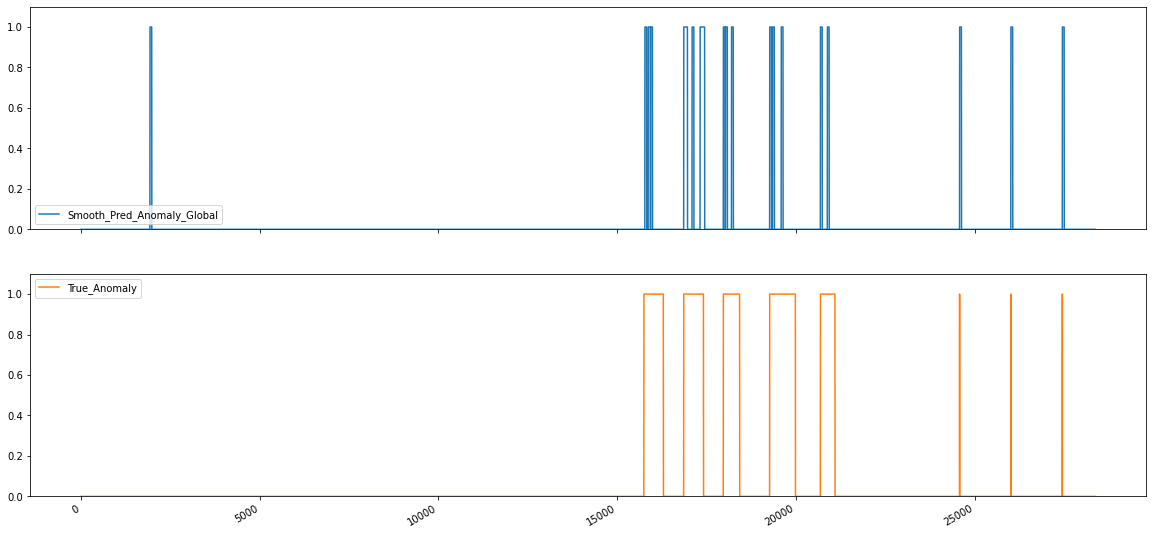

In [22]:
output.loc[:, [f'Smooth_Pred_Anomaly_Global', 'True_Anomaly']].plot(subplots=True, figsize=(20, 10), ylim=(0,1.1))
plt.show()

In [15]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [31]:
precision_score(output['True_Anomaly'], output['Smooth_Pred_Anomaly_Global'])

0.4865040650406504

In [32]:
recall_score(output['True_Anomaly'], output['Smooth_Pred_Anomaly_Global'])

0.5553080920564217

In [33]:
f1_score(output['True_Anomaly'], output['Smooth_Pred_Anomaly_Global'])

0.5186340786964811

In [28]:
output['mean_rse'] = np.mean(output.iloc[:, 2:-41:3], 1)


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

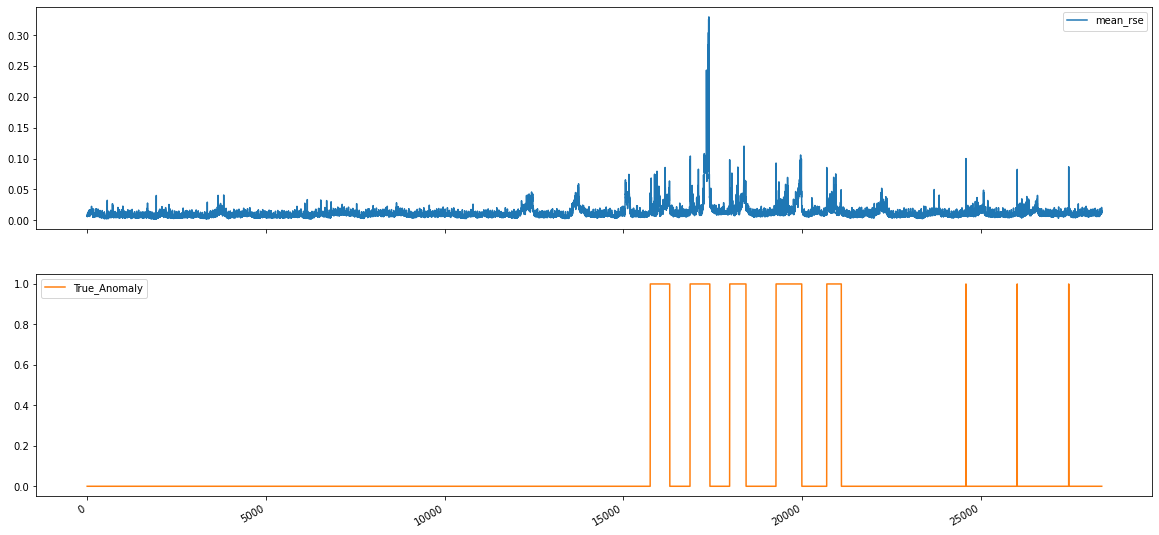

In [29]:
output.loc[:, [f'mean_rse', 'True_Anomaly']].plot(subplots=True, figsize=(20, 10))

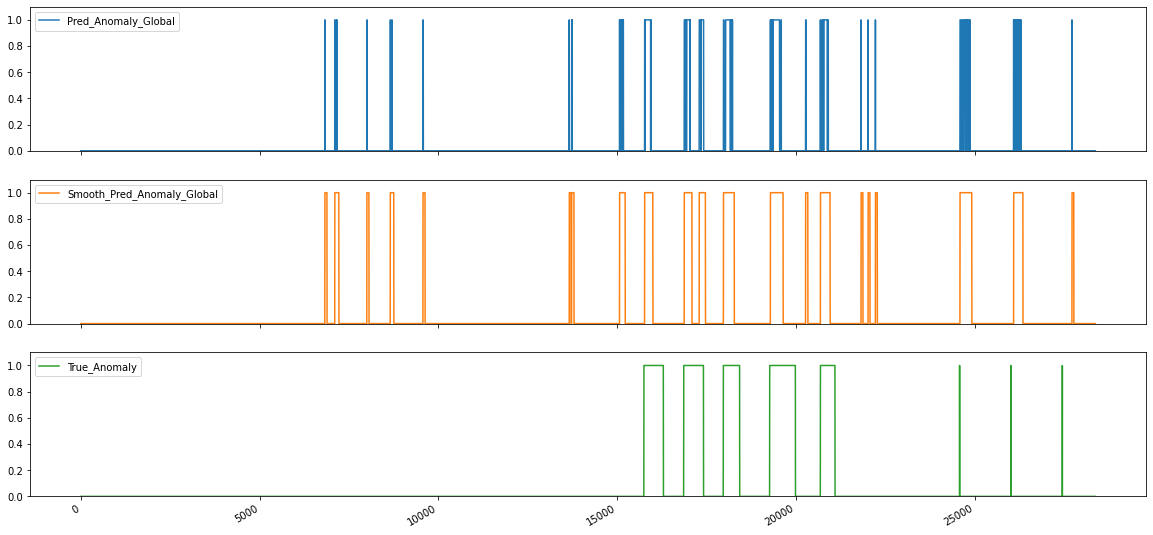

In [30]:
sum_rse = output['mean_rse']
thresh = np.mean(rses) + 1.5*np.std(rses)
output[f'Pred_Anomaly_Global'] = (rses > thresh).astype(int)

w = 50
i = w
output['Smooth_Pred_Anomaly_Global'] = 0
while i < output.shape[0]:
    if output.loc[i, 'Pred_Anomaly_Global'] == 1:
        output.loc[i:i+w, 'Smooth_Pred_Anomaly_Global'] = 1
        i += 1
    else:
        i += 1

output.loc[:, [f'Pred_Anomaly_Global','Smooth_Pred_Anomaly_Global','True_Anomaly']].plot(subplots=True, figsize=(20, 10), ylim=(0,1.1))
plt.show()